In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv('data_all.csv')
df2 = pd.read_csv('data_200.csv')
df5 = pd.read_csv('data_500.csv')

In [3]:
df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


# The distribution of phi and psi combinations 

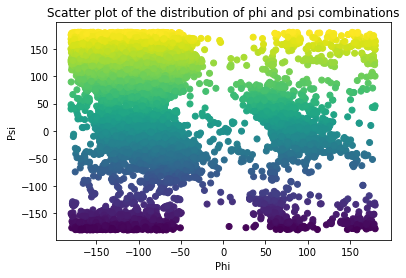

In [4]:
# Scatter plot 
plt.scatter(df['phi'], df['psi'], c = df['psi'])
plt.title('Scatter plot of the distribution of phi and psi combinations')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

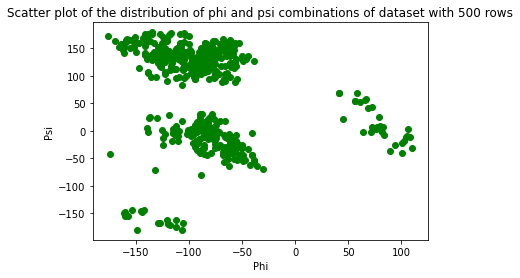

In [5]:
# Scatter plot 
plt.scatter(df5['phi'], df5['psi'], c='g')
plt.title('Scatter plot of the distribution of phi and psi combinations of dataset with 500 rows')
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.show()

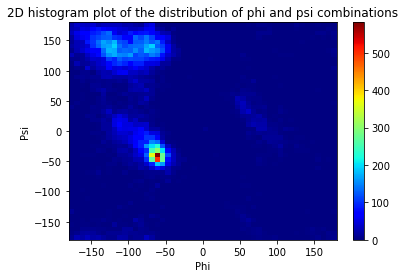

In [6]:
# 2D histogram
x = df['phi']
y = df['psi']
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.title('2D histogram plot of the distribution of phi and psi combinations')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.colorbar()
plt.show()

# K-means clustering method to cluster the phi and psi angle combinations

### Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

From the 2D histogram plotted above we can assume that there are around 2-4 clusters. Hence we first manually try k-values ranging from 2-5 and later We used a method called as elbow method to find an appropriate value of K to perform the k-means Clustering. This method plots various values of cost with changing k. As the values of K increases, there will be fewer elements in the cluster. Hence the average distortion will decrease. The fewer the number of elements means it is more closer to the centroid. Therefore the point where the distortion declines the most is the elbow point.

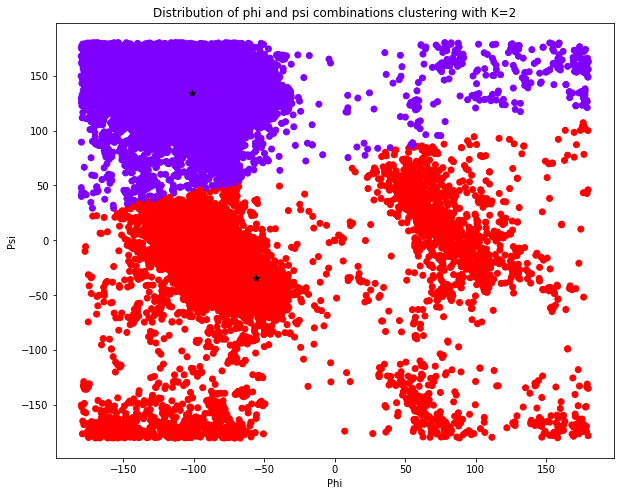

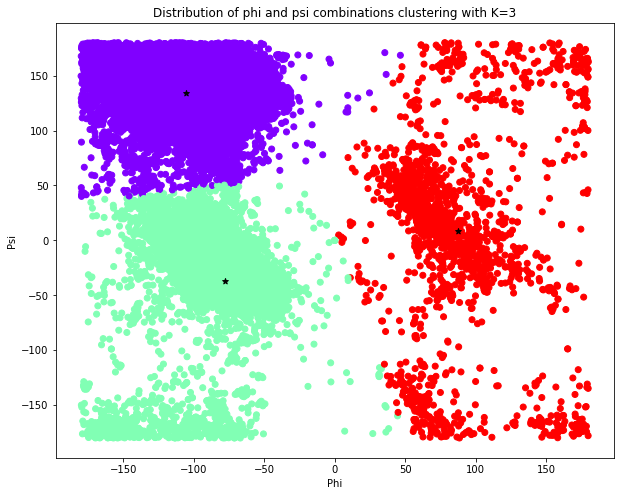

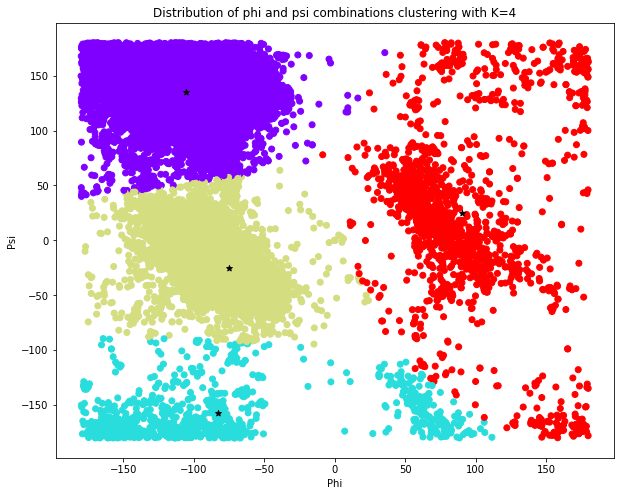

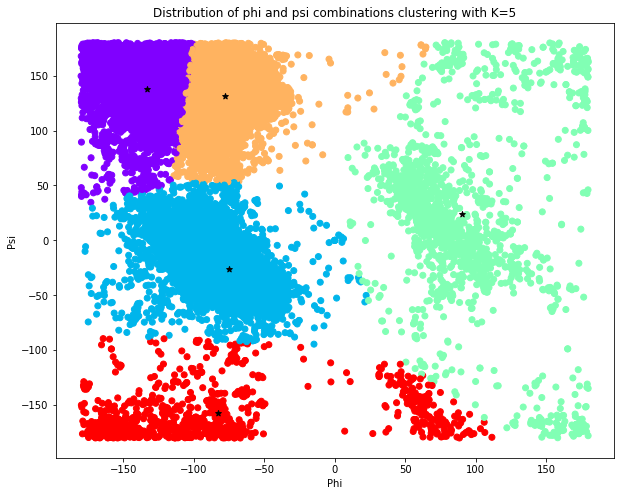

In [7]:
# Kmeans clustering with different values of k from 2 to 5
x = df.iloc[:,3:6]
for i in range(2, 6):
    plt.figure(figsize = (10,8))
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(x)
    
    identified_clusters = kmeans.fit_predict(x)
    df_cls = df.copy()
    df_cls['Clusters'] = identified_clusters
    
    plt.scatter(df_cls['phi'],df_cls['psi'], c = df_cls['Clusters'], cmap = 'rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', marker = '*')
    
    plt.xlabel('Phi')
    plt.ylabel('Psi')
    plt.title('Distribution of phi and psi combinations clustering with K={0}'.format(i))

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['phi','psi']])

In [9]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

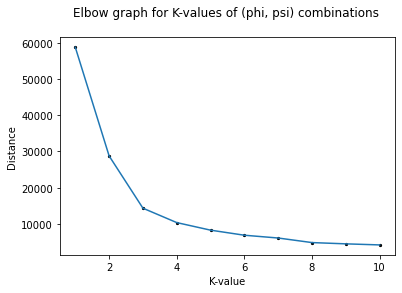

In [10]:
plt.title("Elbow graph for K-values of (phi, psi) combinations \n")
plt.ylabel("Distance")
plt.xlabel("K-value")
plt.scatter(range(1, 11), sse, c='k', s=5)
plt.plot(range(1, 11), sse)
plt.show()

In [11]:
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing")

In [12]:
kl.elbow

3

We can see by the elbow method that there are 3 clusters.

### Do the clusters found in part (a) seem reasonable

Yes the clusters in part a seems reasonable. In the graph above we can clearly see that the distribution of the points are forming 3 clusters. these clusters can also be seen in the 2D histogram plotted above. 
But also if you see the scatter plot plotted above we can see that the partitions are not perfect. we can see that the centeroid of the cluster is a little downwards instead of the center.

#### Since both phi and psi are periodic attributes, you can think of shifting/translating them by some value and then use the modulo operation

Since both  <b>phi</b>  and  <b>psi</b>  are periodic attributes, as we can see from the scatter plot, a small cluster is placed on the lower part on the left of the plot.  We decided to shift the values at -100 become 0 in <b>psi</b> by adding 100  and then modulo the  <b>psi</b>  values for 360 to ensure the range of  <b>psi</b>  are from 0 to 360 and the values less then -100 will be come on the top (For example: <b>(-120 +100)%360 = 340</b>).
On the other hand, we use the same method for <b>phi</b> to shift the range from -180 & 180 to 0 & 360. We also wanted to merge the small cluster from the top on the right side into the cluster we had on the left of the left side, so we added 210 into the <b>phi</b> values so 150 will become 360 and the other's values which larger than 150 will be in the range of 0 to 30.

In [13]:
changed_df = df.copy()

#Phi
phi_temp = np.full((changed_df.shape[0],),210)# shift phi by add 210
changed_df['phi'] = changed_df['phi'] + phi_temp
changed_df['phi'] = changed_df['phi'] % 360 # modulo phi for 360 so phi be range from 0 to 360

#Psi
psi_temp = np.full((changed_df.shape[0],),100)# shift psi by add 100
changed_df['psi'] = changed_df['psi'] + psi_temp
changed_df['psi'] = changed_df['psi'] % 360 # modulo psi for 360 so psi be range from 0 to 360

In [14]:
changed_df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,60.687145,242.657714
1,PRO,11,A,165.716790,236.002076
2,LYS,12,A,90.027379,291.294737
3,LEU,13,A,74.682788,237.143523
4,LEU,14,A,105.148533,195.928520


In [15]:
k = changed_df.iloc[:,3:6]
k.head()

,phi,psi
0,60.687145,242.657714
1,165.716790,236.002076
2,90.027379,291.294737
3,74.682788,237.143523
4,105.148533,195.928520


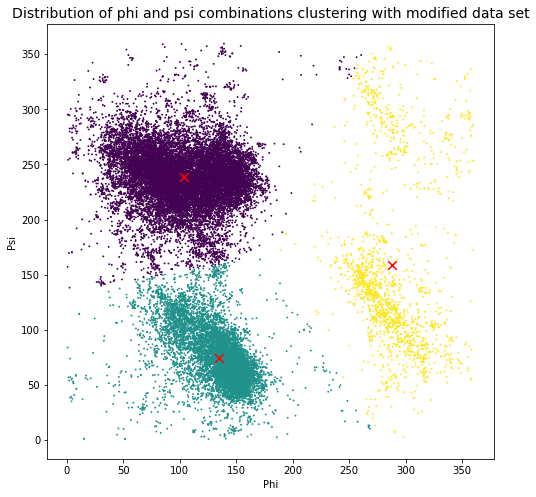

In [16]:
km = KMeans(n_clusters = 3, random_state=0).fit(k)
centroids = km.cluster_centers_

plt.figure(figsize=(8,8))
plt.scatter(changed_df['phi'], changed_df['psi'], 0.75, c = km.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'x', s = 75)
plt.title('Distribution of phi and psi combinations clustering with modified data set', size=14)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

# The DBSCAN method to cluster the phi and psi angle combinations 

In [17]:
z = changed_df.iloc[:,3:6]
z.head()

,phi,psi
0,60.687145,242.657714
1,165.716790,236.002076
2,90.027379,291.294737
3,74.682788,237.143523
4,105.148533,195.928520


In [18]:
z = StandardScaler().fit_transform(z)

#### Minimum number of samples in the neighbourhood
Because of the size of the data set is large so we decided to chose the minimum number of samples in the neighbourhood is 100

In [19]:
neighb = NearestNeighbors(n_neighbors = 100) # n_neighbors equals to the min of samples
nb_z = neighb.fit(z)
distances_z, indices_z = nb_z.kneighbors(z)

#### Maximum distance between two samples

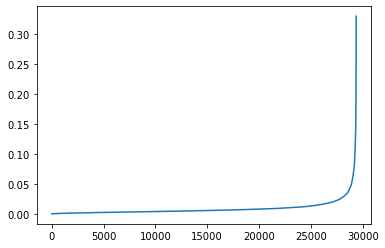

In [20]:
# Sort and plot the distances results to choose the maximum distance between two samples belonging to the same neighbourhood
distances_z = np.sort(distances_z, axis = 0)
distances_z = distances_z[:,1]
plt.plot(distances_z)
plt.show()

From the above plot, we noted that the maximum curvature of the curve is about 0.15, and thus we picked our Maximum distance between two samples as 0.15.

In [21]:
dbscan_z = DBSCAN(eps = 0.15, min_samples = 100).fit(z)
labels_z = dbscan_z.labels_ # getting the labels

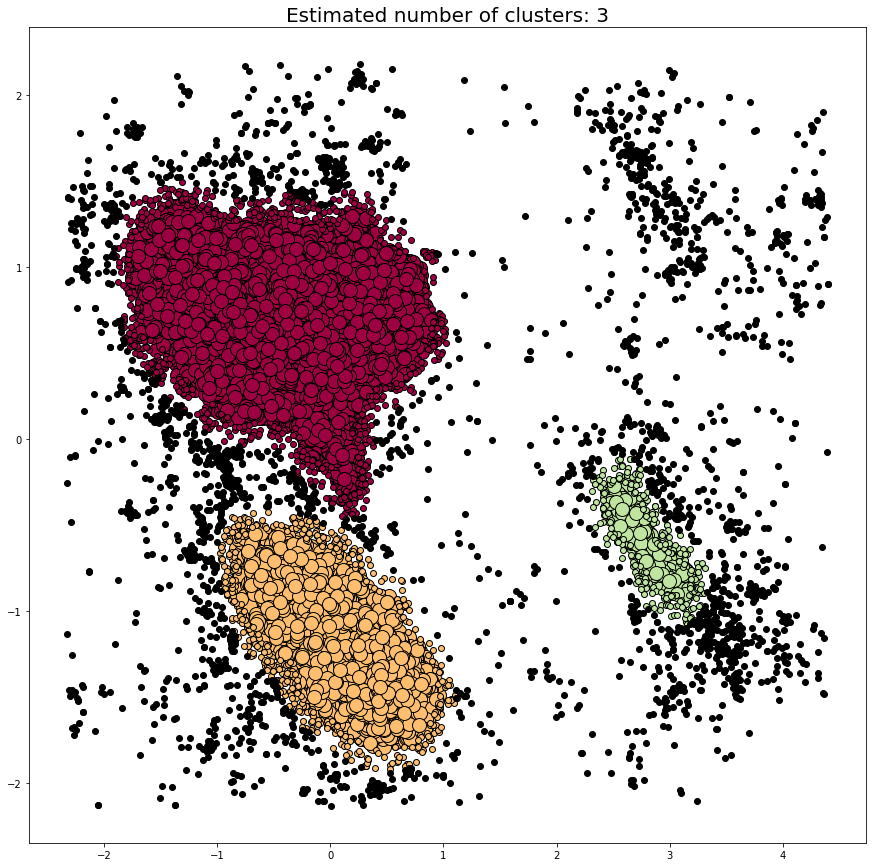

In [22]:
core_samples_mask_z = np.zeros_like(dbscan_z.labels_, dtype=bool)
core_samples_mask_z[dbscan_z.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_z = len(set(labels_z)) - (1 if -1 in labels_z else 0)
n_noise_z = list(labels_z).count(-1)


# Black removed and is used for noise instead.
unique_labels_z = set(labels_z)
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique_labels_z))]
plt.figure(figsize=(15,15))
for k, col in zip(unique_labels_z, colors):
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_z = labels_z == k

    xy = z[class_member_mask_z & core_samples_mask_z]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = z[class_member_mask_z & ~core_samples_mask_z]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_z, fontsize=20)
plt.show()

In [23]:
print('Estimated number of noise points: %d' % n_noise_z)

Estimated number of noise points: 2549


### Residual types as outliers Bar chart 

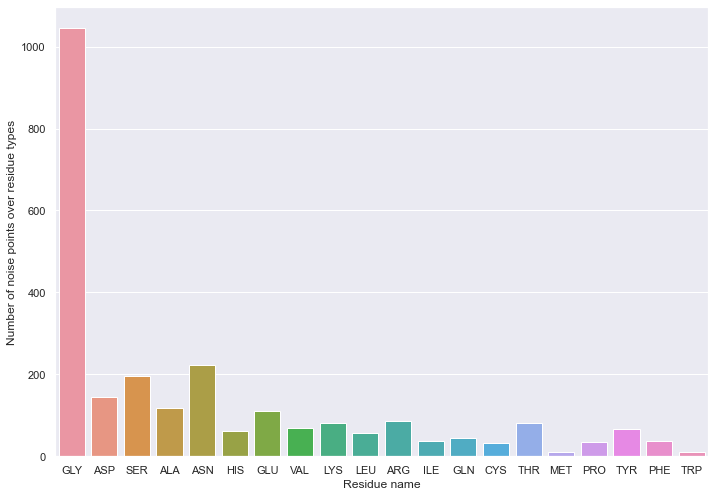

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = changed_df['residue name'][labels_z == -1])
plt.ylabel('Number of noise points over residue types')
plt.xlabel('Residue name')
plt.show()

From the plot above we can see that GLY is the most frequent amino acid residue type outlier.

### Clusters found by DBSCAN vs those found using K-means

Both DBSCAN and K-means gave us three clusters, but the clusters in DBSCAN are better than those found with K-means. The reason behind this is becaus DBSCAN allows us to label data points as noise points and hence it is more visible for the turns-cluster. In the K-means plot the clusters are much more scattered. so we can say that the DBSCAN method is a better way to cluster the data. 

### Discuss whether the clusters found using DBSCAN are robust to small changes in  the  minimum  number  of  samples  in  the  neighbourhood  for  a  point  to  be considered  as  a  core  point,  and/or  the  choice  of  the  maximum  distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

To check this we first plot a graph with small change

In [25]:
z_c = StandardScaler().fit_transform(z)

dbscan_zc = DBSCAN(eps = 0.2, min_samples = 150).fit(z_c)
labels_zc = dbscan_zc.labels_ # getting the labels

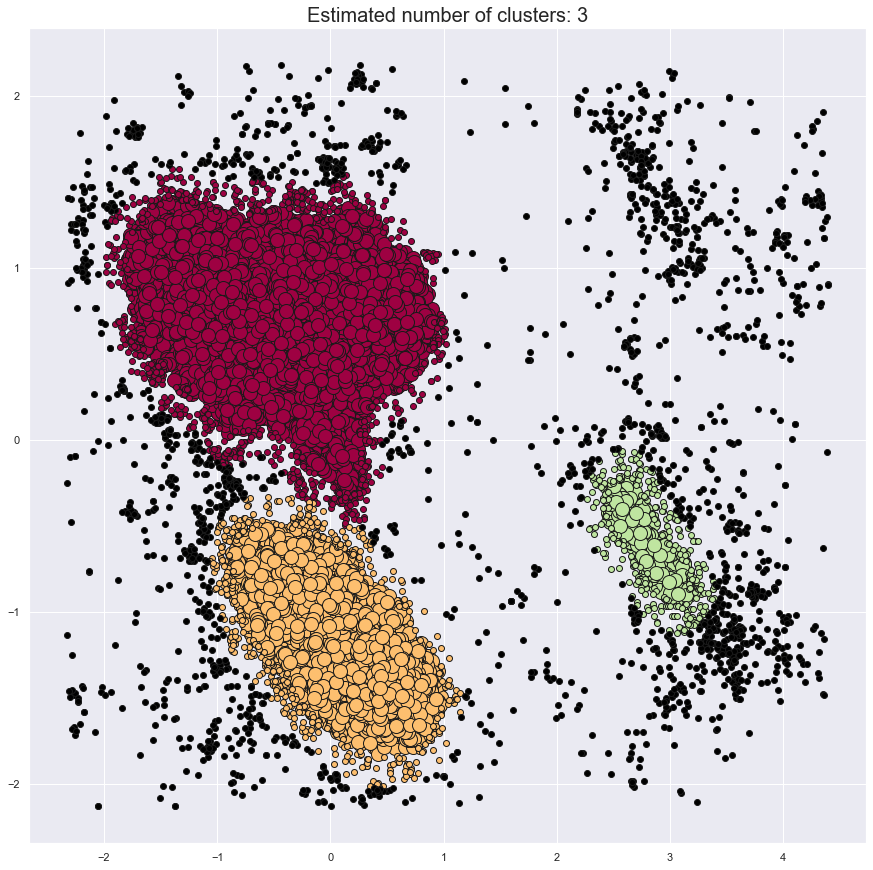

In [26]:
core_samples_mask_zc = np.zeros_like(dbscan_zc.labels_, dtype=bool)
core_samples_mask_zc[dbscan_zc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_zc = len(set(labels_zc)) - (1 if -1 in labels_zc else 0)
n_noise_zc = list(labels_zc).count(-1)


# Black removed and is used for noise instead.
unique_labels_zc = set(labels_zc)
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique_labels_zc))]
plt.figure(figsize=(15,15))
for k, col in zip(unique_labels_zc, colors):
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_zc = labels_zc == k

    xy = z_c[class_member_mask_zc & core_samples_mask_zc]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = z_c[class_member_mask_zc & ~core_samples_mask_zc]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_z, fontsize=20)
plt.show()

In the plot above we can see that a small change of the epsilon does not change much. Hence we can say that DBSCAN is not robust to small changes.

# Stratified the data file by amino acid residue type

In [27]:
# data with the type of residue is PRO
pro_df = changed_df[changed_df['residue name'] == 'PRO']
pro_df.head()

,residue name,position,chain,phi,psi
1,PRO,11,A,165.716790,236.002076
17,PRO,27,A,160.055355,74.111009
68,PRO,79,A,133.547986,197.745207
110,PRO,121,A,156.945980,72.745088
123,PRO,134,A,143.248636,194.099782


In [28]:
p = pro_df.iloc[:,3:6]
p.head()

,phi,psi
1,165.716790,236.002076
17,160.055355,74.111009
68,133.547986,197.745207
110,156.945980,72.745088
123,143.248636,194.099782


Because of the size of the dataset, we chose the minimun samples is 50

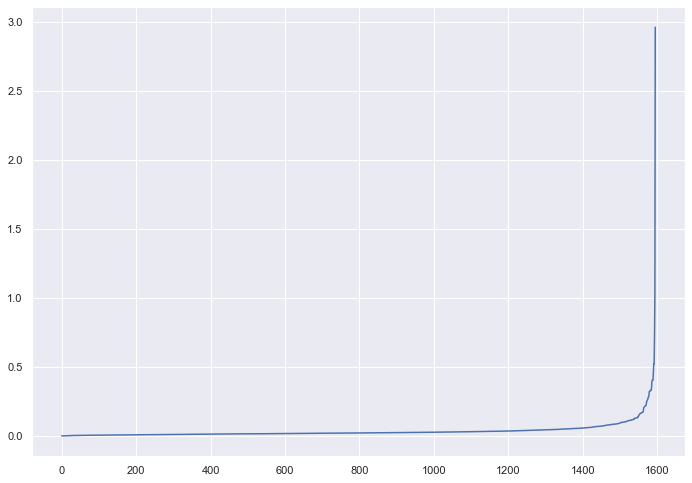

In [29]:
p = StandardScaler().fit_transform(p)
neighb_p = NearestNeighbors(n_neighbors=50) # n_neighbors equals to the min samples
nb_p = neighb_p.fit(p) 
distances_p,indices_p = nb_p.kneighbors(p)
distances_p = np.sort(distances_p, axis = 0) 
distances_p = distances_p[:, 1] 
plt.plot(distances_p)
plt.show()

From the graph above, we can see that the maximum curvature of the curve is about 0.4. Therefore, we chose Eps as 0.4.

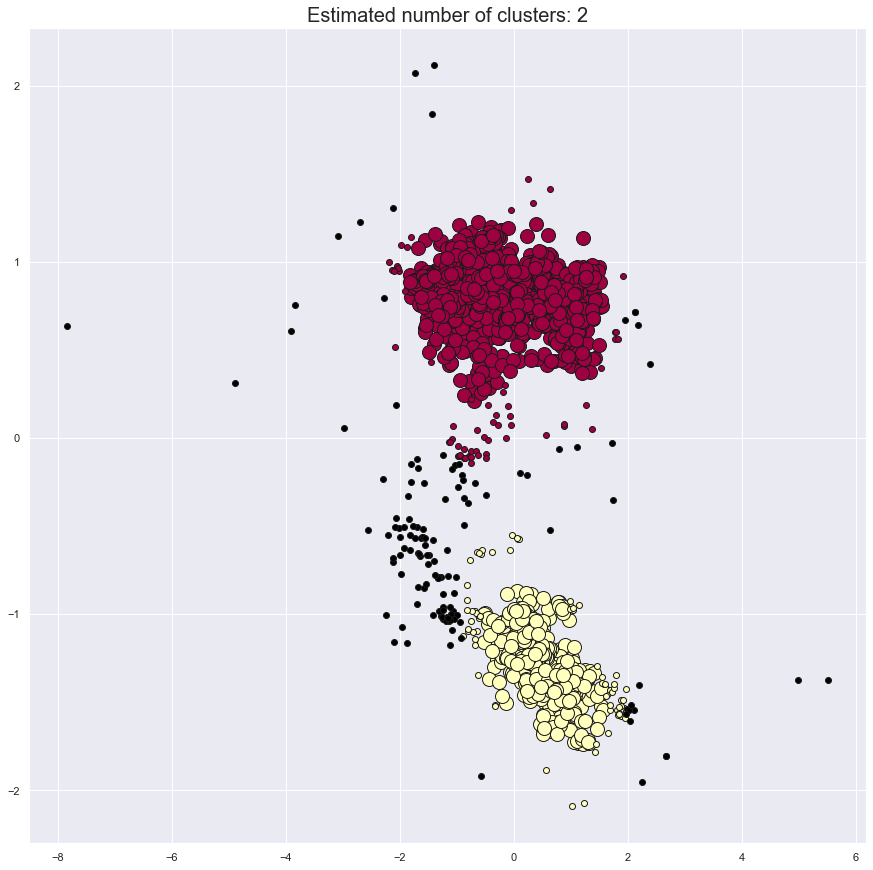

In [30]:
dbscan_p = DBSCAN(eps = 0.4, min_samples = 50).fit(p) # fitting the model
labels_p = dbscan_p.labels_


core_samples_mask_p = np.zeros_like(dbscan_p.labels_, dtype=bool)
core_samples_mask_p[dbscan_p.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_p = len(set(labels_p)) - (1 if -1 in labels_p else 0)
n_noise_p = list(labels_p).count(-1)

# Black removed and is used for noise instead.
unique_labels_p = set(labels_p)
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique_labels_p))]
plt.figure(figsize=(15,15))
for k, col in zip(unique_labels_p, colors):
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_p = labels_p == k

    xy = p[class_member_mask_p & core_samples_mask_p]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = p[class_member_mask_p & ~core_samples_mask_p]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_p, fontsize=20)
plt.show()

In [31]:
print('Estimated number of noise points: %d for residue type PRO' % n_noise_p)

Estimated number of noise points: 131 for residue type PRO


The clusters found for amino acid residues of type PRO as can be seen in the graph above is placced in the middle of x-axes (-2 to 2), which is can be called an subset of the general clusters (cluster we did for the whole dataset). The claster of amino acid residue PRO type mainly belonged in the 2 biggest cluster of the general cluster. 

In [32]:
# data with the type of residue is GLY
gly_df = changed_df[changed_df['residue name'] == 'GLY']
gly_df.head()

,residue name,position,chain,phi,psi
9,GLY,19,A,303.478288,73.747204
10,GLY,20,A,275.608117,155.368614
19,GLY,29,A,282.426939,107.659478
23,GLY,33,A,69.566321,259.800231
42,GLY,52,A,87.530888,95.109865


In [33]:
g = gly_df.iloc[:,3:6]
g.head()

,phi,psi
9,303.478288,73.747204
10,275.608117,155.368614
19,282.426939,107.659478
23,69.566321,259.800231
42,87.530888,95.109865


In [34]:
g = StandardScaler().fit_transform(g)

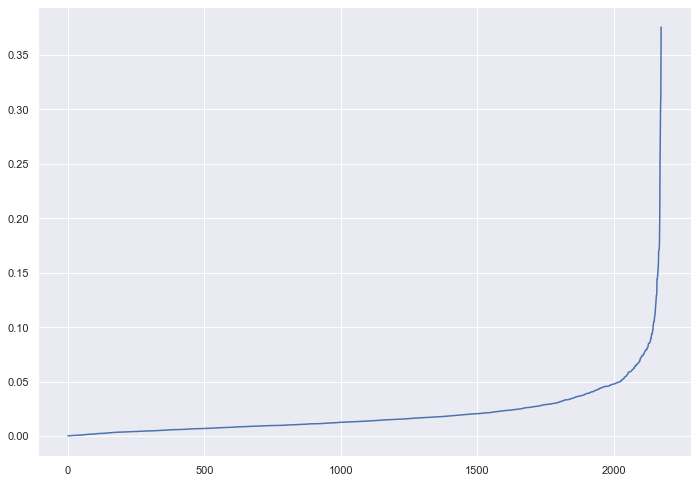

In [35]:
from sklearn.neighbors import NearestNeighbors
neighb_g = NearestNeighbors(n_neighbors = 20) # n_neighbors equals to the min of samples
nb_g = neighb_g.fit(g)
distances_g, indices_g = nb_g.kneighbors(g)

# Sort and plot the distances results
distances_g = np.sort(distances_g, axis = 0)
distances_g = distances_g[:, 1]
plt.plot(distances_g)
plt.show()

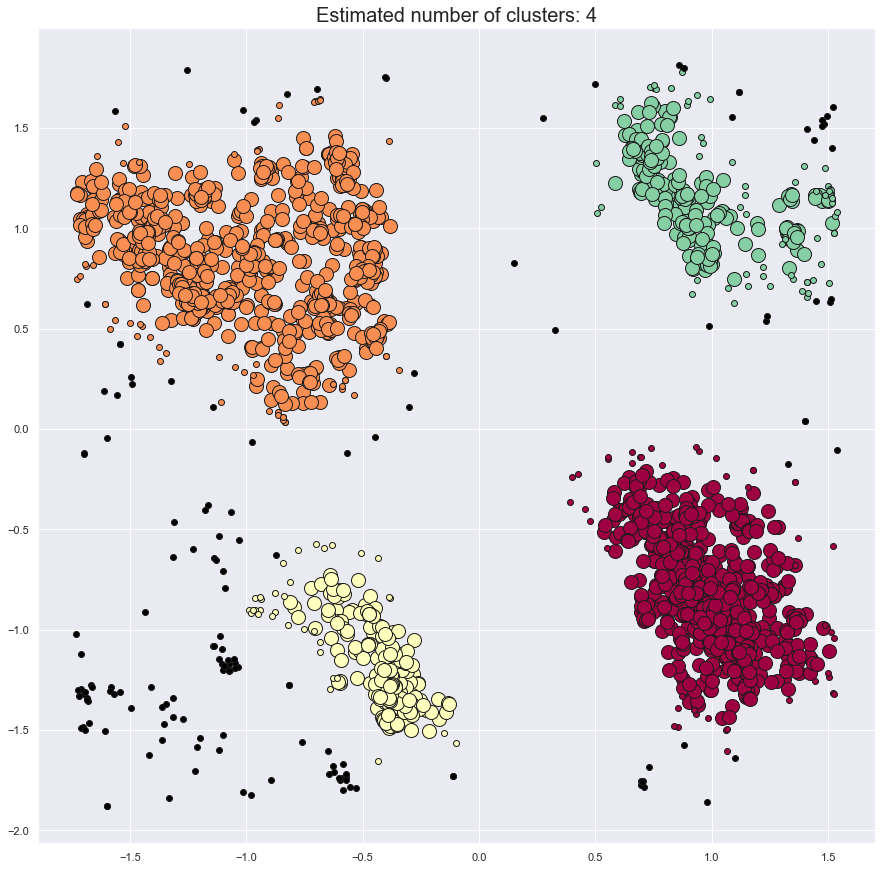

In [36]:
dbscan_g = DBSCAN(eps = 0.2, min_samples = 30).fit(g) # fitting the model
labels_g = dbscan_g.labels_ # getting the labels

core_samples_mask_g = np.zeros_like(dbscan_g.labels_, dtype=bool)
core_samples_mask_g[dbscan_g.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_g = len(set(labels_g)) - (1 if -1 in labels_g else 0)
n_noise_g = list(labels_g).count(-1)

# Black removed and is used for noise instead.
unique_labels_g = set(labels_g)
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique_labels_g))]
plt.figure(figsize=(15,15))
for k, col in zip(unique_labels_g, colors):
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_g = labels_g == k

    xy = g[class_member_mask_g & core_samples_mask_g]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = g[class_member_mask_g & ~core_samples_mask_g]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_g, fontsize=20)
plt.show()

In [37]:
print('Estimated number of noise points: %d for residue type GLY' % n_noise_g)

Estimated number of noise points: 156 for residue type GLY


The cluster of GLY residue's type is quite familiar with the general one, which is that the cluster of amino acid GLY type is also spread over the range. Which also explained why GLY is the animo acid have the most ouliers. However, there are obviously some different between amino acid residues of type GLY and the general which are the density of the cluster (apparently GLY is a subset of the mix of residue's type) and the number of clusters. 